# Simple Linear Regression
Analyze tips data from seaborn  
    * Total Bill as Independent Variable/ X  
    * Tips as Dependent Variable/ Y  
Analyze the relationship  
Apply Simple Linear Regression  
Perform F Test and T Test  
Interpret the result  
* use α 5%    

## Library

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import normaltest

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## ML Business Formulation

* Problem Statement: Bagaimana kita bisa memprediksi jumlah tip yang diberikan oleh pelanggan restoran sehingga kita bisa meminimalisir terjadinya ketidakadilan pendapatan tip.
* Data: 
    * Label: tip
    * Feature: Total Bill
* ML objective: meminimalisasi gap tip yang didapat oleh setiap pelayan restoran,karena tip adalah komponen besar dari pendapatan pelayan restoran.
* Action: mengalokasikan pelayan restoran sesuai hasil prediksi
* Value: moral dari karyawan restoran meningkat

## Data

In [4]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## EDA
To understand our data:  
* descriptive statistics
* Correlation
* grafik

In [6]:
tips[['total_bill','tip']].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


Perhatikan nilai min dan maks dari total bill:  
* min: 3.07
* maks: 50.18  

Nantinya, kita direkomendasikan untuk melakukan prediksi hanya di range ini

In [7]:
# korelasi
normaltest(tips['tip'])
# kurang dari 0.05, tolak Ho, distribusi data tidak normal

NormaltestResult(statistic=79.37862574074785, pvalue=5.796294322907102e-18)

In [9]:
tips[['total_bill','tip']].corr('spearman') #karena distribusi tidak normal

# nilai korelasi 0.68
# korelasi moderate
# hubungan positif/ berbanding lurus

,total_bill,tip
total_bill,1.000000,0.678968
tip,0.678968,1.000000


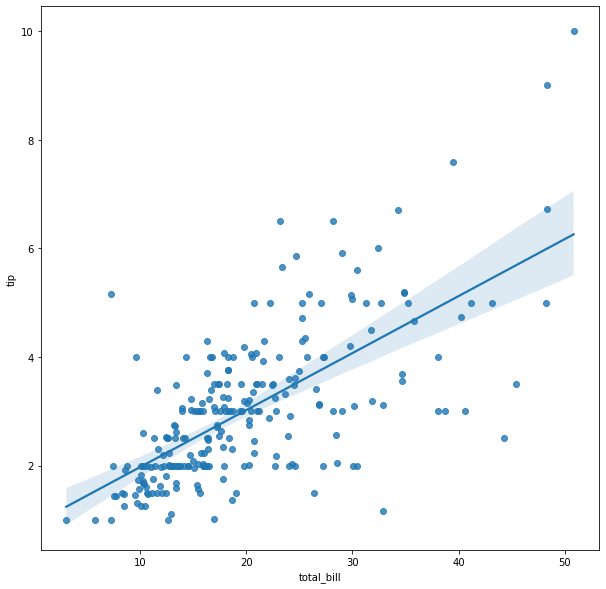

In [11]:
plt.figure(figsize=(10,10))
sns.regplot(x='total_bill',y='tip', data=tips)
plt.show()

## Modelling  
X: total_bill  
Y: tip

In [12]:
import statsmodels.api as sm #library

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [15]:
sm_lm=sm.OLS(tips['tip'],sm.add_constant(tips[['total_bill']])) # model, (y, add_constant(x))
result=sm_lm.fit() #fitting: model akan belajar dari data untuk membuat rule prediksi/ membuat persamaan regresi 

In [14]:
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           6.69e-34
Time:                        11:05:51   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

## Interpretation  

F-statistics:
prob(F-statistics)<=0.05, ada cukup bukti bahwa _total_bill_ memiliki pengaruh signifikan terhadap _tip_  

Partial test (t-test):  
* B0 (const): p value(P>|t|) <=0.05, sebenarnya nilai konstanta bisa dipakai (signifikan), tapi, dalam kasus ini, B0 menjadi tidak relevan, karena tidak mungkin orang makan di restoran dan memiliki total_bill =0 (dapat diskon 100%?).
* B1 (total_bill): p value (P>|t|) <=0.05, artinya kita punya cukup bukti bahwa *total_bill* memiliki pengaruh signifikan terhadap nilai *tip*

Parameter estimate (coef):
* B0(const): karena nilai intersep tidak relevan dengan kasus ini, maka tidak perlu diintepretasikan.
* B1 (total_bill): 0.1050, artinya, ketika nilai total_bill naik 1 USD, maka nilai tip yang diberikan akan meningkat sebesar rata-rata 0.105 USD. Perlu diperhatikan bahwa intepretasi ini direkomendasikan hanya ketika nilai total_bill berada di range 3.07 USD dan 50.81 USD

Coefficient Determination (R-Squared):

R-Squared: 0.457/ 45.7%, artinya model kita mampu menjelaskan 45.7% variasi dari data tip (Y).

# Latihan  
Gunakan Data MPG  
y: mpg  
x: pilih dari displacement, horsepower, weight, acceleration

* lakukan EDA sederhana untuk memilih feature (x)
* Buat model simple linear regression
* lakukan intepretasi dari summary model kalian

In [16]:
mpg= sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [17]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
